In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange

In [2]:
from functions.ellipsoid import Ellipsoid
from functions.rosenbrock import Rosenbrock
from functions.log_ellipsoid import LogEllipsoid
from functions.attractive_sector import AttractiveSector
from functions.sum_of_different_powers import SumOfDifferentPowers

In [3]:
from optimizers.line_search.newton import NewtonLineSearch
from optimizers.line_search.steepest_descent import SteepestDescentLineSearch

In [4]:
from optimizers.line_search.direction import direction_matrix
from optimizers.line_search.step_size.backtracking import backtrack

In [5]:
def plot_contour(f, xs=10, ys=10):
    n = 500
    x, y = np.linspace(-xs, xs, n), np.linspace(-ys, ys, n)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros((n, n))
    for i in range(0, n):
        for j in range(0, n):
            Z[i][j] = f([X[i][j], Y[i][j]])
    plt.contour(X,Y,Z, 50)


In [6]:
def plot_minimizer_ellipsoid(minimize):
    xk_at_i = []
    def c(xk):
        xk_at_i.append(xk)
        if np.linalg.norm(Ellipsoid.gradient(xk)) < 0.1:
            return True
        return False
    minimize(Ellipsoid.f, [10, 10], Ellipsoid.gradient, hes=Ellipsoid.hessian, callback=c)
    print([np.linalg.norm(xk) for xk in xk_at_i])
    plt.yscale('log')
    plt.plot([np.linalg.norm(Ellipsoid.gradient(xk)) for xk in xk_at_i])

In [7]:
def print_state(xk, F, p_matrix):
    print("-----")
    print("x: ", xk)
    print("f(x): ", F.f(xk))
    print("f_grad(x): ", F.gradient(xk))
    print("f_hess(x):", F.hessian(xk))
    print("alpha: ", backtrack(F.f, xk, -1* p_matrix @ F.gradient(xk), F.gradient))
    print("-----")
def plot_contour_from_function(minimize, F, xs=10, ys=10, g_tol=0.5, debug=False, start_point=[8,8], p_matrix_f=lambda *_: direction_matrix.steepest_gradient(2)):
    xk_at_i = [start_point]
    if debug:
        print_state(start_point, F, p_matrix_f(F.hessian, start_point))
    def c(xk):
        if debug:
            print_state(xk, F, p_matrix_f(F.hessian, start_point))
        xk_at_i.append(xk)
        if np.linalg.norm(F.gradient(xk)) < g_tol:
            return True
        return False
    plot_contour(F.f, xs=xs, ys=ys)
    minimize(F.f, start_point, F.gradient, hes=F.hessian, callback=c)
    #print([np.linalg.norm(F.gradient(xk)) for xk in xk_at_i])
    #print(xk_at_i)
    plt.plot([xk[0] for xk in xk_at_i[:-1]], [xk[1] for xk in xk_at_i[:-1]], c='orange')
    plt.scatter([xk[0] for xk in xk_at_i[:-1]], [xk[1] for xk in xk_at_i[:-1]], c='orange')

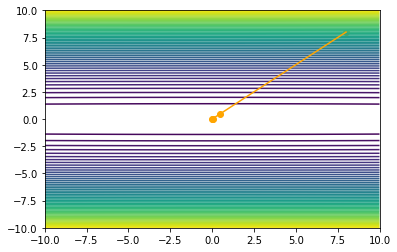

In [8]:
plot_contour_from_function(NewtonLineSearch.minimize, Ellipsoid)

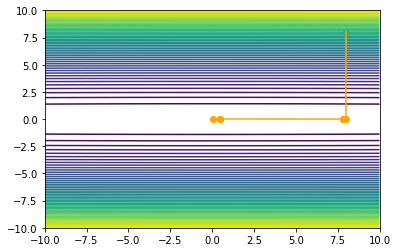

In [9]:
plot_contour_from_function(SteepestDescentLineSearch.minimize, Ellipsoid)

[0.842007382733411, 0.050132204317704564, 0.002984816952071537, 0.00017771275687207907, 1.0580824372883627e-05]


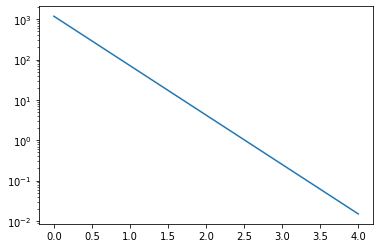

In [10]:
plot_minimizer_ellipsoid(NewtonLineSearch.minimize)

[9.990004812552517, 9.923498584949224, 9.912451309221144, 9.75916229521892, 9.749339484148795, 0.5653768620147962, 0.5646457632888837, 0.08605182922483999, 0.08584011332250656, 0.0328056910564001, 0.03275273546733498]


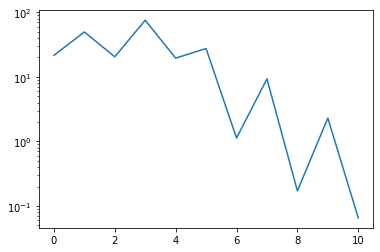

In [11]:
plot_minimizer_ellipsoid(SteepestDescentLineSearch.minimize)

In [12]:
def plot_minimizer_rosenbrock(minimize):
    xk_at_i = []
    def c(xk):
        xk_at_i.append(xk)
        if np.linalg.norm(Rosenbrock.gradient(xk)) < 0.1:
            return True
        return False
    minimize(Rosenbrock.f, [10, 10], Rosenbrock.gradient, hes=Rosenbrock.hessian, callback=c)
    #print([np.linalg.norm(xk) for xk in xk_at_i])
    plt.yscale('log')
    plt.plot([np.linalg.norm(Rosenbrock.gradient(xk)) for xk in xk_at_i])

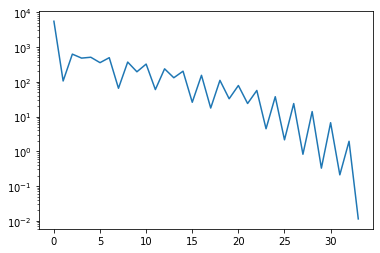

In [13]:
plot_minimizer_rosenbrock(NewtonLineSearch.minimize)

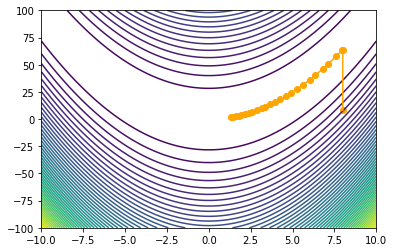

In [14]:
plot_contour_from_function(NewtonLineSearch.minimize, Rosenbrock, xs=10, ys=100)

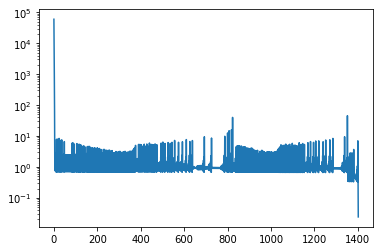

In [15]:
plot_minimizer_rosenbrock(SteepestDescentLineSearch.minimize)

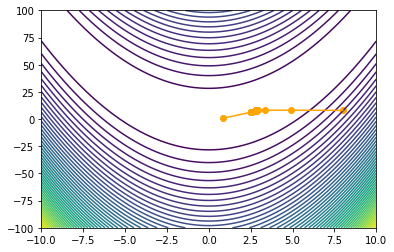

In [16]:
plot_contour_from_function(SteepestDescentLineSearch.minimize, Rosenbrock, xs=10, ys=100)

In [29]:
def plot_minimizer_log_ellipsoid(minimize):
    xk_at_i = []
    print("1")
    def c(xk):
        xk_at_i.append(xk)
        if np.linalg.norm(LogEllipsoid.gradient(xk)) < 0.1:
            return True
        return False
    print("2")
    plt.xlabel("iterations")
    plt.ylabel("gradient norm")
    minimize(LogEllipsoid.f, [10, 10], LogEllipsoid.gradient, hes=LogEllipsoid.hessian, callback=c)
    #print([np.linalg.norm(xk) for xk in xk_at_i])
    plt.yscale('log')
    plt.plot([np.linalg.norm(LogEllipsoid.gradient(xk)) for xk in xk_at_i])

1
2


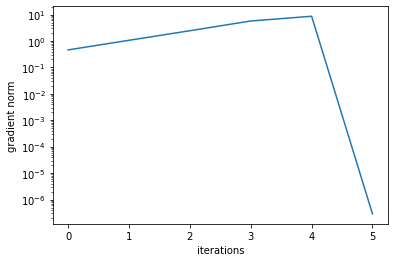

In [30]:
plot_minimizer_log_ellipsoid(NewtonLineSearch.minimize)

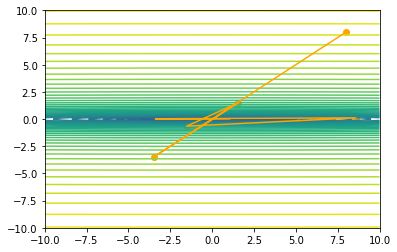

In [19]:
plot_contour_from_function(NewtonLineSearch.minimize, LogEllipsoid, g_tol=0.2)

In [20]:
print("hello")

hello


1
2


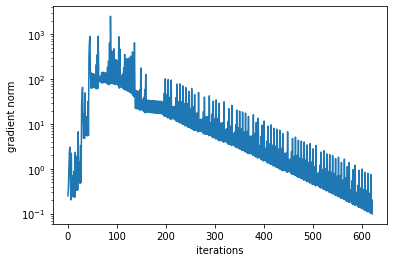

In [31]:
plot_minimizer_log_ellipsoid(SteepestDescentLineSearch.minimize)

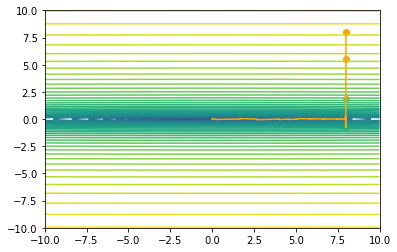

In [22]:
plot_contour_from_function(SteepestDescentLineSearch.minimize, LogEllipsoid, g_tol=0.2)

In [23]:
def plot_minimizer_attractive_sector(minimize):
    xk_at_i = []
    print("1")
    def c(xk):
        xk_at_i.append(xk)
        if np.linalg.norm(AttractiveSector.gradient(xk)) < 0.1:
            return True
        return False
    print("2")
    minimize(AttractiveSector.f, [10, 10], AttractiveSector.gradient, hes=AttractiveSector.hessian, callback=c)
    #print([np.linalg.norm(xk) for xk in xk_at_i])
    plt.yscale('log')
    plt.plot([np.linalg.norm(AttractiveSector.gradient(xk)) for xk in xk_at_i])

1
2


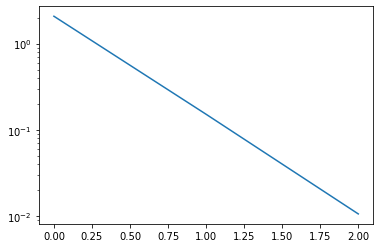

In [24]:
plot_minimizer_attractive_sector(NewtonLineSearch.minimize)

-----
x:  [-8, -8]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-

alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]


-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----
-----
x:  [-8. -8.]
f(x):  12800.0
f_grad(x):  [1599.980000249997, 1599.980000249997]
f_hess(x): [[399.99000019   0.        ]
 [  0.         399.99000019]]
alpha:  (1.3046258610564396e-16, 369)
-----


KeyboardInterrupt: 

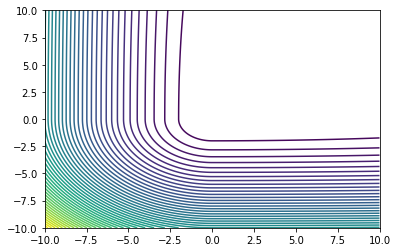

In [25]:
plot_contour_from_function(NewtonLineSearch.minimize, AttractiveSector, g_tol=1, start_point=[-8, -8], debug=True, p_matrix_f=direction_matrix.newton)

In [ ]:
plot_minimizer_attractive_sector(SteepestDescentLineSearch.minimize)

In [ ]:
def plot_minimizer_sum_of_different_powers(minimize):
    xk_at_i = []
    print("1")
    def c(xk):
        xk_at_i.append(xk)
        if np.linalg.norm(SumOfDifferentPowers.gradient(xk)) < 0.1:
            return True
        return False
    print("2")
    minimize(SumOfDifferentPowers.f, [10, 10], SumOfDifferentPowers.gradient, hes=SumOfDifferentPowers.hessian, callback=c)
    #print([np.linalg.norm(xk) for xk in xk_at_i])
    plt.yscale('log')
    plt.plot([np.linalg.norm(SumOfDifferentPowers.gradient(xk)) for xk in xk_at_i])

In [ ]:
plot_minimizer_sum_of_different_powers(NewtonLineSearch.minimize)

In [ ]:
plot_contour_from_function(NewtonLineSearch.minimize, SumOfDifferentPowers)

In [ ]:
plot_minimizer_sum_of_different_powers(SteepestDescentLineSearch.minimize)

In [ ]:
plot_contour_from_function(SteepestDescentLineSearch.minimize, SumOfDifferentPowers)